In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sp = pd.read_csv('/content/sales prediction.zip')


In [ ]:
sp.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
sp.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
sp.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
sp.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
sp.shape

(200, 5)

In [ ]:
sp.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

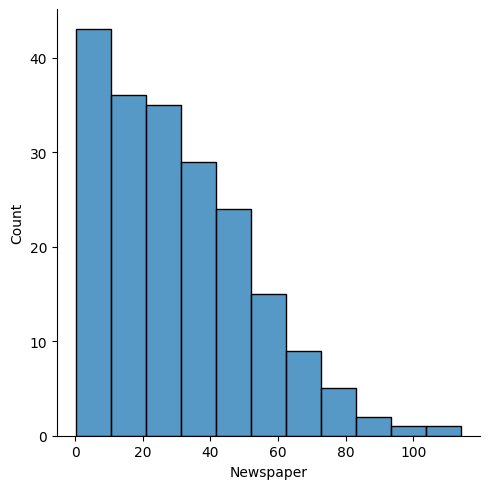

In [ ]:
sns.displot(sp['Newspaper'])


In [ ]:
iqr = sp.Newspaper.quantile(0.75) - sp.Newspaper.quantile(0.25)

In [ ]:
lower_bridge = sp['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = sp['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [ ]:
data = sp.copy()

In [ ]:
data.loc[data['Newspaper']>=93,'Newspaper'] = 93

<Axes: ylabel='Newspaper'>

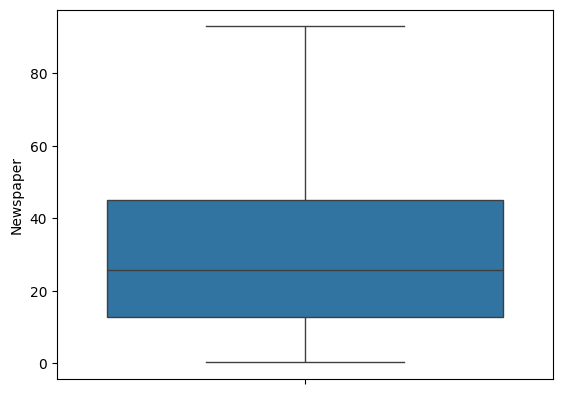

In [ ]:
sns.boxplot(data['Newspaper'])

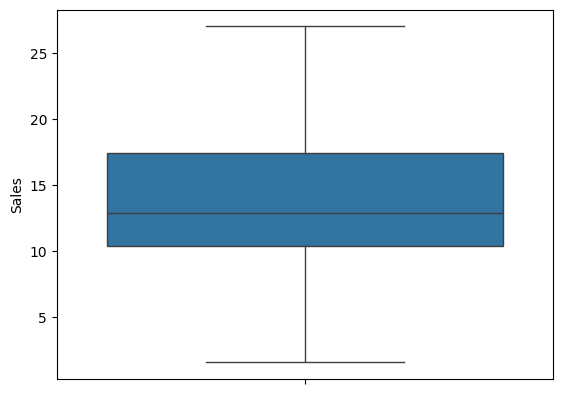

In [ ]:
sns.boxplot(data['Sales']);

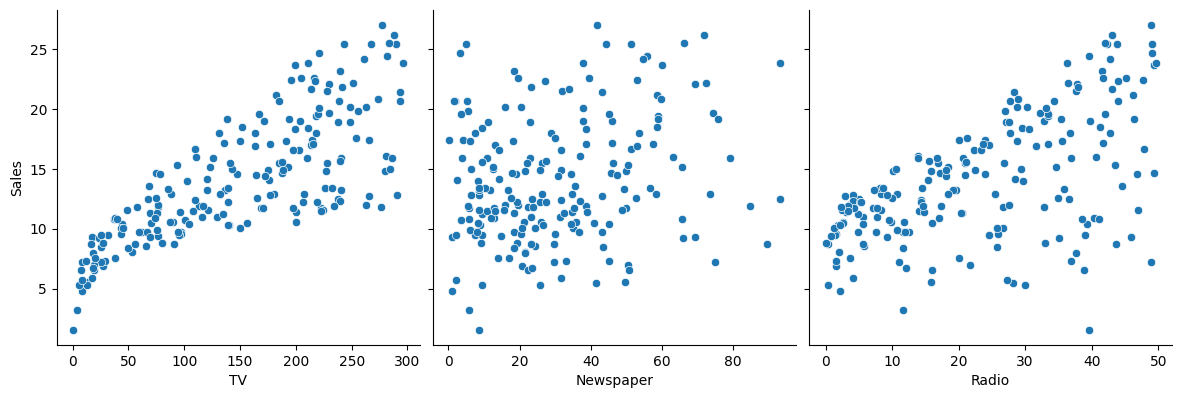

In [ ]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'], y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 25.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


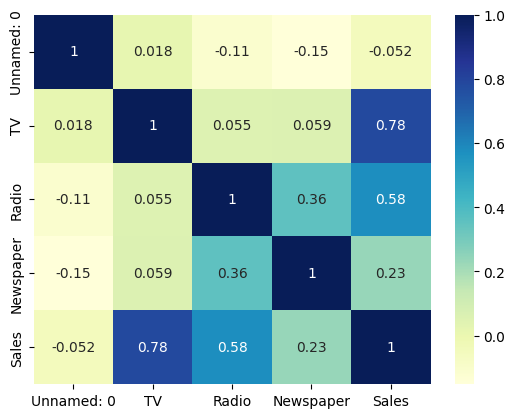

In [ ]:
!pip install matplotlib --upgrade
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) # Changed 'ylGnBu' to 'YlGnBu'
plt.show()

In [ ]:
important_features = list(data.corr()['Sales'][ (data.corr()['Sales'] > 0.5) | (data.corr()['Sales'] < -0.5) ].index)
print(important_features)

['TV', 'Radio', 'Sales']


In [ ]:
x = data['TV']
y = data['Sales']

In [ ]:
print(x.shape,y.shape)

(200,) (200,)


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,)

In [ ]:
print(x_train.shape)

print(y_train.shape)

print(x_test.shape)

print(y_test.shape)

(160,)
(160,)
(40,)
(40,)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
knn = KNeighborsRegressor().fit(x_train.values.reshape(-1, 1),y_train) # Reshape x_train to a 2D array
knn_train_pred = knn.predict(x_train.values.reshape(-1, 1)) # Reshape x_train to a 2D array
knn_test_pred = knn.predict(x_test.values.reshape(-1, 1)) # Reshape x_test to a 2D array

In [ ]:
print(knn_train_pred,knn_test_pred)

[ 7.52 19.72 11.1  12.1  19.68 17.08 14.06  7.52 14.36  5.92 17.54 13.7
 11.22  5.9  10.66 17.18 17.54  7.24  7.72 17.54 19.16 20.14 18.7  17.3
  5.08 12.1  10.28 12.34 13.22 18.9  12.58 10.9  15.28  8.58 16.06 14.66
  8.4   8.2  21.3  20.82 10.88 14.66 14.36 12.58 21.16 14.82  8.66  9.72
 10.66 16.02 21.16 18.3  16.8  16.94 10.32 11.22 15.3  15.92 18.1  17.3
 16.02 14.34 18.7  13.14 11.22 11.62 17.52 10.32  8.58 15.92 10.66  7.24
 10.18  9.58 15.58 18.1  13.22 10.36  8.2  10.18 15.48 17.08 10.5  16.06
  5.08 19.96 15.3  20.34 20.14  9.96 12.1  14.5  19.76 20.22 19.04 17.3
 16.7  20.82 19.2  18.92 20.14 19.2  19.04  5.08 17.58 12.58 16.02 17.46
 12.44 20.82 19.72 11.32 11.32 15.3   9.72 19.88  7.38 10.28 14.5  14.5
 11.1  18.92 12.38 16.8   7.52  7.72 16.06 12.78 16.88 10.28 20.22 17.28
  7.72 19.7  10.36 16.06 14.04 10.88 11.22 13.22 20.62 14.06 16.06 14.02
  5.08 10.5  10.88 17.46 12.6   8.58 15.36 14.04 17.46 14.98 19.38 17.46
 12.1  18.3  17.58 10.5 ] [ 5.9  13.7  19.68  9.28 10.36

In [ ]:
result = pd.DataFrame(columns=["Model", "Train R2", "Test R2","Train RMSE","Varianice"])

In [ ]:
r2 = r2_score(y_test, knn_test_pred)
r2_train = r2_score(y_train, knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test, knn_test_pred))
variance = r2_train - r2


In [ ]:
# Use pd.concat to concatenate the dictionary to the DataFrame.
result = pd.concat([result, pd.DataFrame({"Model": "KNN", "Train R2": r2_train, "Test R2": r2,"Train RMSE":rmse,"Varianice":variance}, index=[0])], ignore_index=True)

In [ ]:
print("R2: ", r2)
print("RMSE: ", rmse)

R2:  0.312667304385182
RMSE:  4.012434423140146


In [ ]:
result.head()

,Model,Train R2,Test R2,Train RMSE,Varianice
0,KNN,0.689987,0.312667,4.012434,0.37732
1,KNN,0.689987,0.312667,4.012434,0.37732


In [ ]:
svr = SVR().fit(x_train.values.reshape(-1, 1),y_train)
svr

SVR()

In [ ]:
import statsmodels.api as sm

In [ ]:
x_train_constant = sm.add_constant(x_train)
x_train_constant

,const,TV
121,1.0,18.8
70,1.0,199.1
34,1.0,95.7
191,1.0,75.5
84,1.0,213.5
...,...,...
23,1.0,228.3
115,1.0,75.1
20,1.0,218.4
139,1.0,184.9


In [ ]:
model = sm.OLS(y_train, x_train_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     243.1
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           8.87e-34
Time:                        04:54:27   Log-Likelihood:                -418.53
No. Observations:                 160   AIC:                             841.1
Df Residuals:                     158   BIC:                             847.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1917      0.522     13.777      0.000       6.161       8.223
TV             0.0471      0.003     15.591      0.000       0.041       0.053
==============================================================================
Omnibus:                        0.554   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.692
Skew:                          -0.112   Prob(JB):                        0.707
Kurtosis:                       2.768   Cond. No.                         342.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

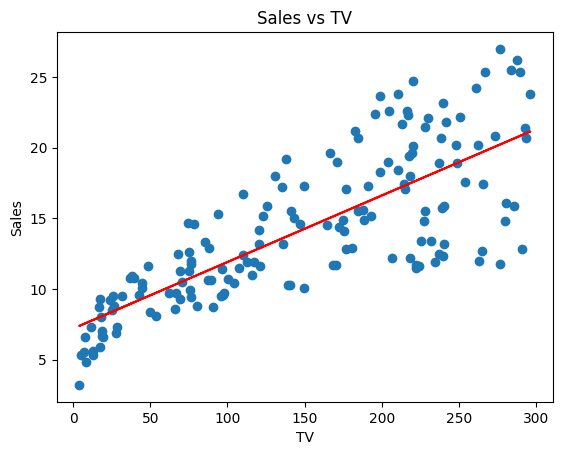

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(), color='red')
plt.title('Sales vs TV')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [ ]:
y_train_pred = model.predict(x_train_constant)
res =(y_train - y_train_pred)
res

,0
121,-1.077380
70,1.728331
34,-2.200291
191,-0.848629
84,4.449918
...,...
23,-2.447339
115,1.870216
20,0.519070
139,4.797321


In [ ]:
y_train_pred

,0
121,8.077380
70,16.571669
34,11.700291
191,10.748629
84,17.250082
...,...
23,17.947339
115,10.729784
20,17.480930
139,15.902679


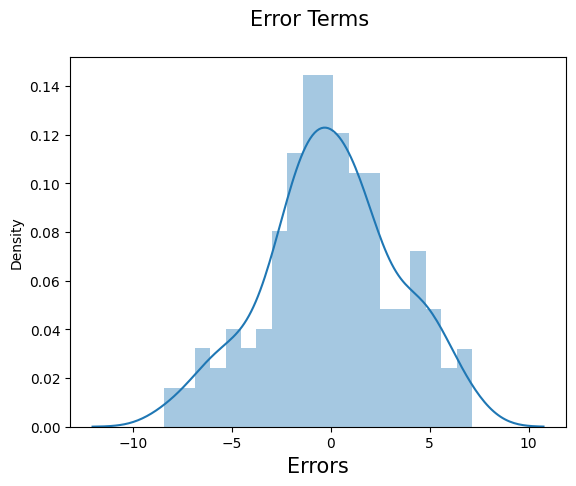

In [ ]:
fig = plt.figure()
sns.distplot(res, bins=20)
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('Errors', fontsize=15)
plt.show()

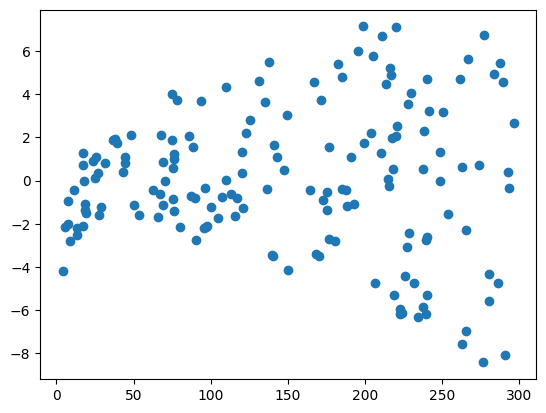

In [ ]:
plt.scatter(x_train, res)
plt.show()

In [ ]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [ ]:
y_pred

,0
132,7.587416
67,13.754373
74,17.245371
182,9.839368
38,9.222201
103,16.044015
169,20.585610
159,13.396322
141,16.317265
5,7.601549


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.96588137332494

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.6244578735418238

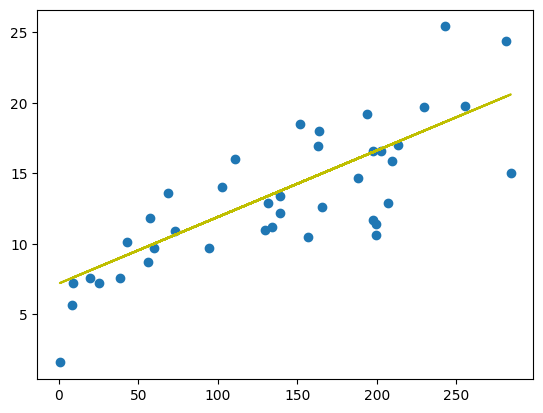

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_test, model.predict(sm.add_constant(x_test)), 'y') # add_constant is used to add a constant to the x_test array to make it compatible with the model.
plt.show()